# Bit allocation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lists of RD (Rate/Distortion) points
curve1 = [(1,20), (2,10), (3,6), (4,3), (5,1.6), (6,1)]
curve2 = [(0.9,15), (1.8, 11), (3.1,7.5), (4,6), (5.2,5), (6.5,4.6)]

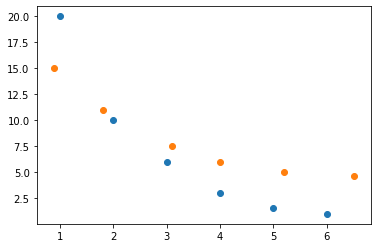

In [3]:
plt.scatter(*zip(*curve1))
plt.scatter(*zip(*curve2))
plt.show()

In [4]:
slopes1 = [] # [(slope, rate, curve)]
for i in range(len(curve1)-1):
    slope = (curve1[i][1]-curve1[i+1][1])/(curve1[i+1][0]-curve1[i][0])
    slopes1.append((slope, curve1[i+1][0], 1))
print(slopes1)

[(10.0, 2, 1), (4.0, 3, 1), (3.0, 4, 1), (1.4, 5, 1), (0.6000000000000001, 6, 1)]


In [5]:
slopes2 = []
for i in range(len(curve2)-1):
    slope = (curve2[i][1]-curve2[i+1][1])/(curve2[i+1][0]-curve2[i][0])
    slopes2.append((slope, curve2[i+1][0], 2))
print(slopes2)

[(4.444444444444445, 1.8, 2), (2.692307692307692, 3.1, 2), (1.6666666666666667, 4, 2), (0.8333333333333333, 5.2, 2), (0.307692307692308, 6.5, 2)]


In [6]:
both = slopes1 + slopes2
print(both)

[(10.0, 2, 1), (4.0, 3, 1), (3.0, 4, 1), (1.4, 5, 1), (0.6000000000000001, 6, 1), (4.444444444444445, 1.8, 2), (2.692307692307692, 3.1, 2), (1.6666666666666667, 4, 2), (0.8333333333333333, 5.2, 2), (0.307692307692308, 6.5, 2)]


In [7]:
sorted_lists = sorted(both, key=lambda tup: tup[0])[::-1]
print(sorted_lists)

[(10.0, 2, 1), (4.444444444444445, 1.8, 2), (4.0, 3, 1), (3.0, 4, 1), (2.692307692307692, 3.1, 2), (1.6666666666666667, 4, 2), (1.4, 5, 1), (0.8333333333333333, 5.2, 2), (0.6000000000000001, 6, 1), (0.307692307692308, 6.5, 2)]


In [8]:
R = 8 # Bit budget
spent = 0
i = 0
optimal = []
while True:
    spent += sorted_lists[i][1]
    if spent < R:
        optimal.append(sorted_lists[i])
    else:
        break
    i += 1
print("Optimal RD points =", optimal)
br = sum([i[1] for i in optimal])
print("bit-rate =", br)

Optimal RD points = [(10.0, 2, 1), (4.444444444444445, 1.8, 2), (4.0, 3, 1)]
bit-rate = 6.8
